In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("atm_bank_dataset.csv")
df

,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300
...,...,...,...,...,...,...,...,...,...,...,...
2239,11565,Mount Road ATM,MONDAY,NH,W,HWW,5,9,2017,276058,447400
2240,11570,Mount Road ATM,TUESDAY,NH,W,WWW,6,9,2017,276058,153800
2241,11575,Mount Road ATM,WEDNESDAY,NH,W,WWW,6,9,2017,276058,167100
2242,11580,Mount Road ATM,THURSDAY,NH,W,WWH,6,9,2017,276058,317400


In [3]:
df.drop(columns=['id', 'atm_name'],axis=1,inplace=True)

In [4]:
df.isnull().sum()

weekday                   0
festival_religion         0
working_day               0
holiday_sequence          0
trans_date_set            0
trans_month               0
trans_year                0
prevweek_mean             0
total_amount_withdrawn    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   weekday                 2244 non-null   object
 1   festival_religion       2244 non-null   object
 2   working_day             2244 non-null   object
 3   holiday_sequence        2244 non-null   object
 4   trans_date_set          2244 non-null   int64 
 5   trans_month             2244 non-null   int64 
 6   trans_year              2244 non-null   int64 
 7   prevweek_mean           2244 non-null   int64 
 8   total_amount_withdrawn  2244 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 157.9+ KB


In [6]:
df.describe(include="all")

,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
count,2244,2244,2244,2244,2244.000000,2244.000000,2244.000000,2.244000e+03,2.244000e+03
unique,7,5,2,8,NaN,NaN,NaN,NaN,NaN
top,SUNDAY,NH,W,WWW,NaN,NaN,NaN,NaN,NaN
freq,525,2079,1281,703,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.557932,6.313280,2013.710784,5.150901e+05,5.157175e+05
std,NaN,NaN,NaN,NaN,1.760703,3.257336,1.920082,1.935272e+05,2.551791e+05
min,NaN,NaN,NaN,NaN,1.000000,1.000000,2011.000000,1.800000e+03,1.000000e+02
25%,NaN,NaN,NaN,NaN,2.000000,4.000000,2012.000000,4.197290e+05,3.494750e+05
50%,NaN,NaN,NaN,NaN,4.000000,6.000000,2014.000000,5.403860e+05,5.141000e+05
75%,NaN,NaN,NaN,NaN,5.000000,9.000000,2015.000000,6.378000e+05,6.849250e+05


In [7]:
df.nunique()

weekday                      7
festival_religion            5
working_day                  2
holiday_sequence             8
trans_date_set               7
trans_month                 12
trans_year                   7
prevweek_mean              338
total_amount_withdrawn    1969
dtype: int64

# EDA


C:\Users\NILKANTHA BAG\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\NILKANTHA BAG\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


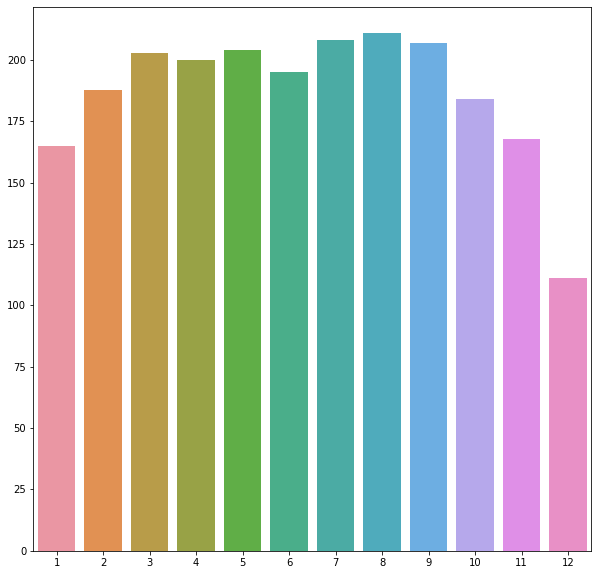

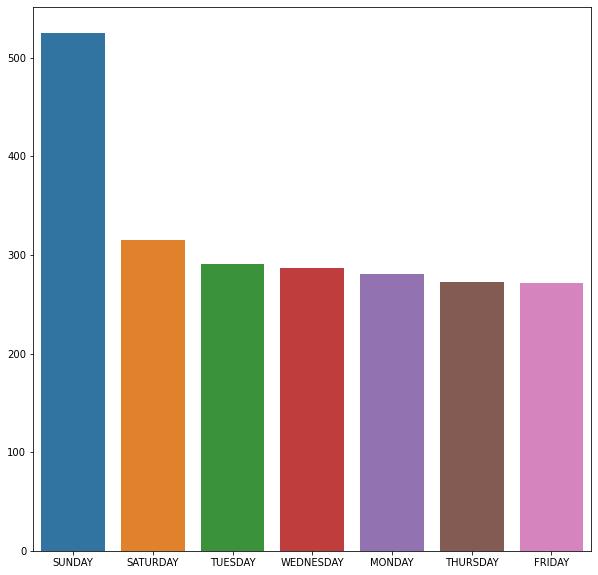

In [8]:
categorical_var=["trans_month","weekday"]
for i in categorical_var:
    plt.figure(figsize=(10,10))
    sns.barplot(df[i].value_counts().index,df[i].value_counts().values)
    

In [9]:
df.shape

(2244, 9)

In [10]:
df=pd.get_dummies(df,columns=['weekday','festival_religion','working_day','holiday_sequence'],drop_first=True)

In [11]:
df.shape

(2244, 23)

<AxesSubplot:>

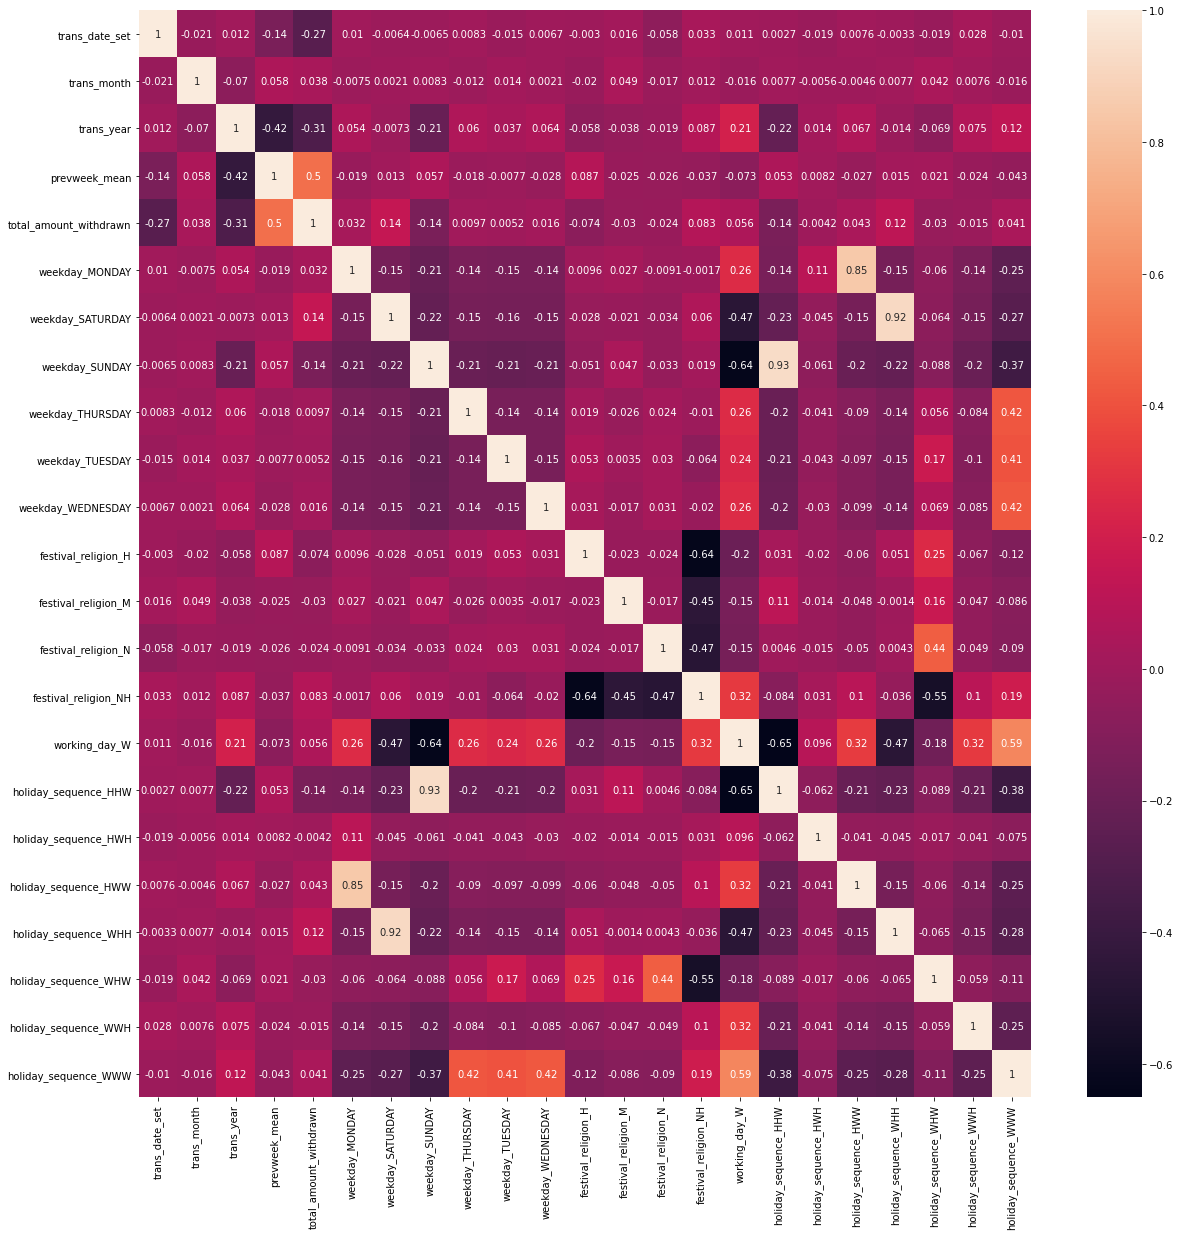

In [12]:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Total amount withdrawan')

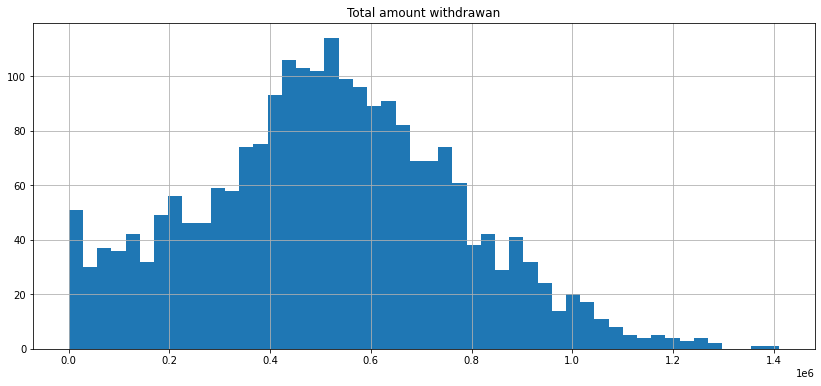

In [13]:
plt.figure(figsize=(14,6))
df['total_amount_withdrawn'].hist(bins=50)
plt.title('Total amount withdrawan')

In [14]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = ['total_amount_withdrawn'])
y = df['total_amount_withdrawn']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(1683, 22) (561, 22) (1683,) (561,)


# ANN


In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model=Sequential()
model.add(Dense(30,activation='relu',input_dim=22))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation="linear"))
model.compile(optimizer='Adam',loss="mse")

# Model1

In [17]:
model.fit(xtrain,ytrain,batch_size=100,epochs=500)
y_pred=model.predict(xtest)

Epoch 1/500
17/17 [==============================] - 0s 1ms/step - loss: 289510391808.0000
Epoch 2/500
17/17 [==============================] - 0s 1ms/step - loss: 240343662592.0000
Epoch 3/500
17/17 [==============================] - 0s 1ms/step - loss: 191237439488.0000
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 133447254016.0000
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 80929923072.0000
Epoch 6/500
17/17 [==============================] - 0s 2ms/step - loss: 56754855936.0000
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 53908152320.0000
Epoch 8/500
17/17 [==============================] - 0s 2ms/step - loss: 53896433664.0000
Epoch 9/500
17/17 [==============================] - 0s 1ms/step - loss: 53811892224.0000
Epoch 10/500
17/17 [==============================] - 0s 2ms/step - loss: 53803356160.0000
Epoch 11/500
17/17 [==============================] - 0s 2ms/step - loss: 53809635328.0000
Epoc

17/17 [==============================] - 0s 1ms/step - loss: 53547933696.0000
Epoch 91/500
17/17 [==============================] - 0s 1ms/step - loss: 53569986560.0000
Epoch 92/500
17/17 [==============================] - 0s 1ms/step - loss: 53743099904.0000
Epoch 93/500
17/17 [==============================] - 0s 1ms/step - loss: 53670387712.0000
Epoch 94/500
17/17 [==============================] - 0s 1ms/step - loss: 53604032512.0000
Epoch 95/500
17/17 [==============================] - 0s 1ms/step - loss: 53596061696.0000
Epoch 96/500
17/17 [==============================] - 0s 1ms/step - loss: 53629775872.0000
Epoch 97/500
17/17 [==============================] - 0s 1ms/step - loss: 53611229184.0000
Epoch 98/500
17/17 [==============================] - 0s 1ms/step - loss: 53543403520.0000
Epoch 99/500
17/17 [==============================] - 0s 1ms/step - loss: 53573058560.0000
Epoch 100/500
17/17 [==============================] - 0s 1ms/step - loss: 53580984320.0000
Epoch 101/5

17/17 [==============================] - 0s 1ms/step - loss: 53253660672.0000
Epoch 180/500
17/17 [==============================] - 0s 1ms/step - loss: 53316128768.0000
Epoch 181/500
17/17 [==============================] - 0s 1ms/step - loss: 53289304064.0000
Epoch 182/500
17/17 [==============================] - 0s 1ms/step - loss: 53209489408.0000
Epoch 183/500
17/17 [==============================] - 0s 1ms/step - loss: 53281034240.0000
Epoch 184/500
17/17 [==============================] - 0s 1ms/step - loss: 53137760256.0000
Epoch 185/500
17/17 [==============================] - 0s 1ms/step - loss: 53070036992.0000
Epoch 186/500
17/17 [==============================] - 0s 1ms/step - loss: 53144920064.0000
Epoch 187/500
17/17 [==============================] - 0s 1ms/step - loss: 53091102720.0000
Epoch 188/500
17/17 [==============================] - 0s 1ms/step - loss: 53230616576.0000
Epoch 189/500
17/17 [==============================] - 0s 1ms/step - loss: 53284024320.0000
Ep

17/17 [==============================] - 0s 1ms/step - loss: 52537868288.0000
Epoch 268/500
17/17 [==============================] - 0s 1ms/step - loss: 52467171328.0000
Epoch 269/500
17/17 [==============================] - 0s 1ms/step - loss: 52597977088.0000
Epoch 270/500
17/17 [==============================] - 0s 1ms/step - loss: 52408131584.0000
Epoch 271/500
17/17 [==============================] - 0s 1ms/step - loss: 52419522560.0000
Epoch 272/500
17/17 [==============================] - 0s 1ms/step - loss: 52433719296.0000
Epoch 273/500
17/17 [==============================] - 0s 1ms/step - loss: 52395778048.0000
Epoch 274/500
17/17 [==============================] - 0s 1ms/step - loss: 52357365760.0000
Epoch 275/500
17/17 [==============================] - 0s 997us/step - loss: 52410777600.0000
Epoch 276/500
17/17 [==============================] - 0s 1ms/step - loss: 52371390464.0000
Epoch 277/500
17/17 [==============================] - 0s 1ms/step - loss: 52315377664.0000


17/17 [==============================] - 0s 1ms/step - loss: 50916048896.0000
Epoch 357/500
17/17 [==============================] - 0s 1ms/step - loss: 50830016512.0000
Epoch 358/500
17/17 [==============================] - 0s 1ms/step - loss: 50891796480.0000
Epoch 359/500
17/17 [==============================] - 0s 1ms/step - loss: 51128868864.0000
Epoch 360/500
17/17 [==============================] - 0s 1ms/step - loss: 51528732672.0000
Epoch 361/500
17/17 [==============================] - 0s 1ms/step - loss: 50870587392.0000
Epoch 362/500
17/17 [==============================] - 0s 1ms/step - loss: 50962907136.0000
Epoch 363/500
17/17 [==============================] - 0s 1ms/step - loss: 50986180608.0000
Epoch 364/500
17/17 [==============================] - 0s 1ms/step - loss: 50807914496.0000
Epoch 365/500
17/17 [==============================] - 0s 1ms/step - loss: 50723885056.0000
Epoch 366/500
17/17 [==============================] - ETA: 0s - loss: 61880770560.000 - 0s 1m

17/17 [==============================] - 0s 1ms/step - loss: 49705590784.0000
Epoch 445/500
17/17 [==============================] - 0s 1ms/step - loss: 50037784576.0000
Epoch 446/500
17/17 [==============================] - 0s 997us/step - loss: 49761337344.0000
Epoch 447/500
17/17 [==============================] - 0s 1ms/step - loss: 50017968128.0000
Epoch 448/500
17/17 [==============================] - 0s 1ms/step - loss: 49654116352.0000
Epoch 449/500
17/17 [==============================] - 0s 1ms/step - loss: 49681952768.0000
Epoch 450/500
17/17 [==============================] - 0s 1ms/step - loss: 49488424960.0000
Epoch 451/500
17/17 [==============================] - 0s 1ms/step - loss: 49531301888.0000
Epoch 452/500
17/17 [==============================] - 0s 1ms/step - loss: 49448685568.0000
Epoch 453/500
17/17 [==============================] - 0s 1ms/step - loss: 49343754240.0000
Epoch 454/500
17/17 [==============================] - 0s 1ms/step - loss: 49493291008.0000


In [18]:
from sklearn import metrics

MAE_M1=metrics.mean_absolute_error(ytest, y_pred)
MSE_M1=metrics.mean_squared_error(ytest, y_pred)
RMSE_M1=np.sqrt(metrics.mean_squared_error(ytest, y_pred))
print("MAE",MAE_M1)
print("MSE",MSE_M1)
print("RMSE",RMSE_M1)

MAE 167578.1167418672
MSE 44535831414.175995
RMSE 211035.14260467613


# Model2

In [19]:
model = Sequential()

model.add(Dense(24, activation = 'relu', input_dim = 22))

model.add(Dense(15, activation = 'relu'))

model.add(Dense(10, activation = 'relu'))

model.add(Dense(5,  activation = 'relu'))

model.add(Dense(1,activation="linear"))

model.compile(optimizer = 'Adam', loss = 'mse')

In [20]:
model.fit(xtrain, ytrain, batch_size=100,epochs = 500)
y_pred =model.predict(xtest)

Epoch 1/500
17/17 [==============================] - 0s 997us/step - loss: 326263963648.0000
Epoch 2/500
17/17 [==============================] - 0s 1ms/step - loss: 303716990976.0000
Epoch 3/500
17/17 [==============================] - 0s 1ms/step - loss: 264465858560.0000
Epoch 4/500
17/17 [==============================] - 0s 1ms/step - loss: 222546804736.0000
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 173347323904.0000
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 120805916672.0000
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 74739417088.0000
Epoch 8/500
17/17 [==============================] - 0s 1ms/step - loss: 54884241408.0000
Epoch 9/500
17/17 [==============================] - 0s 2ms/step - loss: 54121951232.0000
Epoch 10/500
17/17 [==============================] - 0s 1ms/step - loss: 53940408320.0000
Epoch 11/500
17/17 [==============================] - 0s 2ms/step - loss: 53825241088.0000


17/17 [==============================] - 0s 1ms/step - loss: 53686898688.0000
Epoch 91/500
17/17 [==============================] - 0s 2ms/step - loss: 53625999360.0000
Epoch 92/500
17/17 [==============================] - 0s 1ms/step - loss: 53733564416.0000
Epoch 93/500
17/17 [==============================] - 0s 1ms/step - loss: 53774954496.0000
Epoch 94/500
17/17 [==============================] - 0s 1ms/step - loss: 53816913920.0000
Epoch 95/500
17/17 [==============================] - 0s 1ms/step - loss: 53875429376.0000
Epoch 96/500
17/17 [==============================] - 0s 1ms/step - loss: 53713858560.0000
Epoch 97/500
17/17 [==============================] - 0s 1ms/step - loss: 53695913984.0000
Epoch 98/500
17/17 [==============================] - 0s 1ms/step - loss: 53678108672.0000
Epoch 99/500
17/17 [==============================] - 0s 1ms/step - loss: 53618835456.0000
Epoch 100/500
17/17 [==============================] - 0s 1ms/step - loss: 53666893824.0000
Epoch 101/5

17/17 [==============================] - 0s 1ms/step - loss: 53413785600.0000
Epoch 180/500
17/17 [==============================] - 0s 1ms/step - loss: 53339205632.0000
Epoch 181/500
17/17 [==============================] - 0s 1ms/step - loss: 53328109568.0000
Epoch 182/500
17/17 [==============================] - 0s 1ms/step - loss: 53394391040.0000
Epoch 183/500
17/17 [==============================] - 0s 1ms/step - loss: 53365972992.0000
Epoch 184/500
17/17 [==============================] - 0s 1ms/step - loss: 53376651264.0000
Epoch 185/500
17/17 [==============================] - 0s 1ms/step - loss: 53369819136.0000
Epoch 186/500
17/17 [==============================] - 0s 1ms/step - loss: 53380321280.0000
Epoch 187/500
17/17 [==============================] - 0s 1ms/step - loss: 53358608384.0000
Epoch 188/500
17/17 [==============================] - 0s 1ms/step - loss: 53417304064.0000
Epoch 189/500
17/17 [==============================] - 0s 1ms/step - loss: 53469061120.0000
Ep

17/17 [==============================] - 0s 1ms/step - loss: 52845748224.0000
Epoch 269/500
17/17 [==============================] - 0s 1ms/step - loss: 52817448960.0000
Epoch 270/500
17/17 [==============================] - 0s 1ms/step - loss: 52806885376.0000
Epoch 271/500
17/17 [==============================] - 0s 1ms/step - loss: 52830228480.0000
Epoch 272/500
17/17 [==============================] - 0s 1ms/step - loss: 52875218944.0000
Epoch 273/500
17/17 [==============================] - 0s 1ms/step - loss: 52801892352.0000
Epoch 274/500
17/17 [==============================] - 0s 1ms/step - loss: 52767391744.0000
Epoch 275/500
17/17 [==============================] - 0s 1ms/step - loss: 52878311424.0000
Epoch 276/500
17/17 [==============================] - 0s 1ms/step - loss: 52968529920.0000
Epoch 277/500
17/17 [==============================] - 0s 1ms/step - loss: 52902268928.0000
Epoch 278/500
17/17 [==============================] - 0s 1ms/step - loss: 52842668032.0000
Ep

17/17 [==============================] - 0s 1ms/step - loss: 51762655232.0000
Epoch 357/500
17/17 [==============================] - 0s 1ms/step - loss: 51681615872.0000
Epoch 358/500
17/17 [==============================] - 0s 1ms/step - loss: 51864203264.0000
Epoch 359/500
17/17 [==============================] - 0s 1ms/step - loss: 51758997504.0000
Epoch 360/500
17/17 [==============================] - 0s 1ms/step - loss: 51689607168.0000
Epoch 361/500
17/17 [==============================] - 0s 1ms/step - loss: 51731460096.0000
Epoch 362/500
17/17 [==============================] - 0s 1ms/step - loss: 51700899840.0000
Epoch 363/500
17/17 [==============================] - 0s 1ms/step - loss: 51551395840.0000
Epoch 364/500
17/17 [==============================] - 0s 1ms/step - loss: 51536023552.0000
Epoch 365/500
17/17 [==============================] - 0s 1ms/step - loss: 51532853248.0000
Epoch 366/500
17/17 [==============================] - 0s 1ms/step - loss: 51534344192.0000
Ep

17/17 [==============================] - 0s 1ms/step - loss: 50033930240.0000
Epoch 446/500
17/17 [==============================] - 0s 1ms/step - loss: 49997660160.0000
Epoch 447/500
17/17 [==============================] - 0s 1ms/step - loss: 49982152704.0000
Epoch 448/500
17/17 [==============================] - 0s 1ms/step - loss: 49982316544.0000
Epoch 449/500
17/17 [==============================] - ETA: 0s - loss: 40023158784.000 - 0s 1ms/step - loss: 50135805952.0000
Epoch 450/500
17/17 [==============================] - 0s 1ms/step - loss: 50245144576.0000
Epoch 451/500
17/17 [==============================] - 0s 1ms/step - loss: 50112307200.0000
Epoch 452/500
17/17 [==============================] - 0s 1ms/step - loss: 49869062144.0000
Epoch 453/500
17/17 [==============================] - 0s 1ms/step - loss: 49970429952.0000
Epoch 454/500
17/17 [==============================] - 0s 1ms/step - loss: 49966940160.0000
Epoch 455/500
17/17 [==============================] - 0s 1m

In [21]:
from sklearn import metrics

MAE_M2=metrics.mean_absolute_error(ytest, y_pred)
MSE_M2=metrics.mean_squared_error(ytest, y_pred)
RMSE_M2=np.sqrt(metrics.mean_squared_error(ytest, y_pred))
print("MAE",MAE_M2)
print("MSE",MSE_M2)
print("RMSE",RMSE_M2)

MAE 168775.93986742425
MSE 45380370059.73338
RMSE 213026.68860904116


# MODEL3

In [22]:
model=Sequential()
model.add(Dense(24,activation='relu',input_dim=22))
model.add(Dense(18,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation="relu"))
model.add(Dense(1,activation="linear"))
model.compile(optimizer='Adam',loss="mse")

In [23]:
model.fit(xtrain,ytrain,batch_size=100,epochs=500)
y_pred=model.predict(xtest)

Epoch 1/500
17/17 [==============================] - 0s 1ms/step - loss: 305151016960.0000
Epoch 2/500
17/17 [==============================] - 0s 1ms/step - loss: 283843592192.0000
Epoch 3/500
17/17 [==============================] - 0s 1ms/step - loss: 247918886912.0000
Epoch 4/500
17/17 [==============================] - 0s 1ms/step - loss: 185317376000.0000
Epoch 5/500
17/17 [==============================] - 0s 1ms/step - loss: 110008696832.0000
Epoch 6/500
17/17 [==============================] - 0s 1ms/step - loss: 61687209984.0000
Epoch 7/500
17/17 [==============================] - 0s 1ms/step - loss: 54356131840.0000
Epoch 8/500
17/17 [==============================] - 0s 1ms/step - loss: 53965504512.0000
Epoch 9/500
17/17 [==============================] - 0s 1ms/step - loss: 53807955968.0000
Epoch 10/500
17/17 [==============================] - 0s 1ms/step - loss: 53798330368.0000
Epoch 11/500
17/17 [==============================] - 0s 1ms/step - loss: 53787934720.0000
Epo

17/17 [==============================] - 0s 1ms/step - loss: 53588430848.0000
Epoch 92/500
17/17 [==============================] - 0s 1ms/step - loss: 53672214528.0000
Epoch 93/500
17/17 [==============================] - 0s 1ms/step - loss: 53646778368.0000
Epoch 94/500
17/17 [==============================] - 0s 1ms/step - loss: 53742874624.0000
Epoch 95/500
17/17 [==============================] - 0s 1ms/step - loss: 53584596992.0000
Epoch 96/500
17/17 [==============================] - 0s 1ms/step - loss: 53594112000.0000
Epoch 97/500
17/17 [==============================] - 0s 1ms/step - loss: 53640486912.0000
Epoch 98/500
17/17 [==============================] - 0s 1ms/step - loss: 53474930688.0000
Epoch 99/500
17/17 [==============================] - 0s 1ms/step - loss: 53493743616.0000
Epoch 100/500
17/17 [==============================] - 0s 1ms/step - loss: 53507903488.0000
Epoch 101/500
17/17 [==============================] - 0s 1ms/step - loss: 53579481088.0000
Epoch 102/

17/17 [==============================] - 0s 1ms/step - loss: 53085868032.0000
Epoch 180/500
17/17 [==============================] - 0s 1ms/step - loss: 53018284032.0000
Epoch 181/500
17/17 [==============================] - 0s 1ms/step - loss: 53020930048.0000
Epoch 182/500
17/17 [==============================] - 0s 1ms/step - loss: 53047640064.0000
Epoch 183/500
17/17 [==============================] - 0s 1ms/step - loss: 53019054080.0000
Epoch 184/500
17/17 [==============================] - 0s 1ms/step - loss: 53038276608.0000
Epoch 185/500
17/17 [==============================] - 0s 1ms/step - loss: 53004779520.0000
Epoch 186/500
17/17 [==============================] - 0s 1ms/step - loss: 52974551040.0000
Epoch 187/500
17/17 [==============================] - 0s 1ms/step - loss: 53251657728.0000
Epoch 188/500
17/17 [==============================] - 0s 1ms/step - loss: 52965986304.0000
Epoch 189/500
17/17 [==============================] - 0s 1ms/step - loss: 52908466176.0000
Ep

17/17 [==============================] - 0s 1ms/step - loss: 52010295296.0000
Epoch 268/500
17/17 [==============================] - 0s 1ms/step - loss: 51942100992.0000
Epoch 269/500
17/17 [==============================] - 0s 1ms/step - loss: 52094918656.0000
Epoch 270/500
17/17 [==============================] - 0s 1ms/step - loss: 51856506880.0000
Epoch 271/500
17/17 [==============================] - 0s 1ms/step - loss: 51835604992.0000
Epoch 272/500
17/17 [==============================] - 0s 1ms/step - loss: 52012015616.0000
Epoch 273/500
17/17 [==============================] - 0s 1ms/step - loss: 52110905344.0000
Epoch 274/500
17/17 [==============================] - 0s 997us/step - loss: 51790782464.0000
Epoch 275/500
17/17 [==============================] - 0s 1ms/step - loss: 51847843840.0000
Epoch 276/500
17/17 [==============================] - 0s 1ms/step - loss: 51747831808.0000
Epoch 277/500
17/17 [==============================] - 0s 1ms/step - loss: 51743117312.0000


17/17 [==============================] - 0s 998us/step - loss: 49468788736.0000
Epoch 356/500
17/17 [==============================] - 0s 1ms/step - loss: 49454034944.0000
Epoch 357/500
17/17 [==============================] - 0s 1ms/step - loss: 49291051008.0000
Epoch 358/500
17/17 [==============================] - 0s 1ms/step - loss: 49350291456.0000
Epoch 359/500
17/17 [==============================] - 0s 1ms/step - loss: 49551282176.0000
Epoch 360/500
17/17 [==============================] - 0s 1ms/step - loss: 49377755136.0000
Epoch 361/500
17/17 [==============================] - 0s 1ms/step - loss: 50143219712.0000
Epoch 362/500
17/17 [==============================] - 0s 1ms/step - loss: 49689501696.0000
Epoch 363/500
17/17 [==============================] - 0s 1ms/step - loss: 49644859392.0000
Epoch 364/500
17/17 [==============================] - ETA: 0s - loss: 39298007040.000 - 0s 1ms/step - loss: 49397272576.0000
Epoch 365/500
17/17 [==============================] - 0s 

17/17 [==============================] - 0s 1ms/step - loss: 47956402176.0000
Epoch 444/500
17/17 [==============================] - ETA: 0s - loss: 44481232896.000 - 0s 1ms/step - loss: 48026374144.0000
Epoch 445/500
17/17 [==============================] - 0s 1ms/step - loss: 48210739200.0000
Epoch 446/500
17/17 [==============================] - 0s 1ms/step - loss: 47986327552.0000
Epoch 447/500
17/17 [==============================] - 0s 1ms/step - loss: 48151416832.0000
Epoch 448/500
17/17 [==============================] - 0s 1ms/step - loss: 48140029952.0000
Epoch 449/500
17/17 [==============================] - 0s 1ms/step - loss: 49710841856.0000
Epoch 450/500
17/17 [==============================] - 0s 1ms/step - loss: 49641046016.0000
Epoch 451/500
17/17 [==============================] - 0s 1ms/step - loss: 48319385600.0000
Epoch 452/500
17/17 [==============================] - 0s 1ms/step - loss: 48091942912.0000
Epoch 453/500
17/17 [==============================] - 0s 1m

In [24]:
from sklearn import metrics

MAE_M3=metrics.mean_absolute_error(ytest, y_pred)
MSE_M3=metrics.mean_squared_error(ytest, y_pred)
RMSE_M3=np.sqrt(metrics.mean_squared_error(ytest, y_pred))
print("MAE",MAE_M3)
print("MSE",MSE_M3)
print("RMSE",RMSE_M3)

MAE 165876.8762811943
MSE 43212889787.236725
RMSE 207877.10260448774


# Model4


In [25]:
model=Sequential()
model.add(Dense(22,activation='relu',input_dim=22))
model.add(Dense(20,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(16,activation="relu"))
model.add(Dense(14,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="relu"))
model.compile(optimizer='Adam',loss="mse")

In [26]:
model.fit(xtrain,ytrain,batch_size=10,epochs=500)
y_pred=model.predict(xtest)

Epoch 1/500
169/169 [==============================] - 1s 991us/step - loss: 122209533952.0000
Epoch 2/500
169/169 [==============================] - ETA: 0s - loss: 54163312640.000 - 0s 974us/step - loss: 54377676800.0000
Epoch 3/500
169/169 [==============================] - 0s 1ms/step - loss: 54729535488.0000
Epoch 4/500
169/169 [==============================] - 0s 991us/step - loss: 54559645696.0000
Epoch 5/500
169/169 [==============================] - 0s 1ms/step - loss: 54547472384.0000
Epoch 6/500
169/169 [==============================] - 0s 1ms/step - loss: 54310031360.0000A: 0s - loss: 53586432000.000
Epoch 7/500
169/169 [==============================] - 0s 1ms/step - loss: 54626111488.0000
Epoch 8/500
169/169 [==============================] - 0s 998us/step - loss: 54456115200.0000
Epoch 9/500
169/169 [==============================] - 0s 991us/step - loss: 54362103808.0000
Epoch 10/500
169/169 [==============================] - 0s 986us/step - loss: 54634496000.0000
Epo

169/169 [==============================] - 0s 974us/step - loss: 50829766656.0000
Epoch 86/500
169/169 [==============================] - 0s 968us/step - loss: 50329825280.0000
Epoch 87/500
169/169 [==============================] - 0s 950us/step - loss: 50689216512.0000
Epoch 88/500
169/169 [==============================] - 0s 956us/step - loss: 50433888256.0000
Epoch 89/500
169/169 [==============================] - 0s 938us/step - loss: 50202054656.0000
Epoch 90/500
169/169 [==============================] - 0s 950us/step - loss: 50369662976.0000
Epoch 91/500
169/169 [==============================] - 0s 956us/step - loss: 51109789696.0000
Epoch 92/500
169/169 [==============================] - 0s 980us/step - loss: 50350247936.0000
Epoch 93/500
169/169 [==============================] - 0s 962us/step - loss: 50132729856.0000
Epoch 94/500
169/169 [==============================] - 0s 968us/step - loss: 51038228480.0000
Epoch 95/500
169/169 [==============================] - 0s 950u

169/169 [==============================] - 0s 956us/step - loss: 50587197440.0000
Epoch 170/500
169/169 [==============================] - 0s 968us/step - loss: 50863022080.0000
Epoch 171/500
169/169 [==============================] - 0s 962us/step - loss: 49968619520.0000
Epoch 172/500
169/169 [==============================] - 0s 956us/step - loss: 50448740352.0000
Epoch 173/500
169/169 [==============================] - 0s 962us/step - loss: 51413692416.0000
Epoch 174/500
169/169 [==============================] - 0s 950us/step - loss: 50399039488.0000
Epoch 175/500
169/169 [==============================] - 0s 962us/step - loss: 50603737088.0000
Epoch 176/500
169/169 [==============================] - 0s 926us/step - loss: 50271535104.0000
Epoch 177/500
169/169 [==============================] - 0s 944us/step - loss: 51356561408.0000
Epoch 178/500
169/169 [==============================] - 0s 1ms/step - loss: 50369015808.0000
Epoch 179/500
169/169 [==============================] -

169/169 [==============================] - 0s 938us/step - loss: 48911958016.0000
Epoch 254/500
169/169 [==============================] - 0s 968us/step - loss: 49562660864.0000
Epoch 255/500
169/169 [==============================] - 0s 985us/step - loss: 49226403840.0000
Epoch 256/500
169/169 [==============================] - 0s 950us/step - loss: 49328717824.0000
Epoch 257/500
169/169 [==============================] - 0s 950us/step - loss: 49196212224.0000
Epoch 258/500
169/169 [==============================] - 0s 938us/step - loss: 49278423040.0000 0s - loss: 49223065600.000
Epoch 259/500
169/169 [==============================] - 0s 974us/step - loss: 48541548544.0000
Epoch 260/500
169/169 [==============================] - 0s 956us/step - loss: 48424275968.0000
Epoch 261/500
169/169 [==============================] - 0s 962us/step - loss: 49173381120.0000
Epoch 262/500
169/169 [==============================] - 0s 956us/step - loss: 49071333376.0000 0s - loss: 48842448896.000


169/169 [==============================] - 0s 985us/step - loss: 50131972096.0000
Epoch 337/500
169/169 [==============================] - 0s 938us/step - loss: 51018231808.0000
Epoch 338/500
169/169 [==============================] - 0s 997us/step - loss: 50037993472.0000
Epoch 339/500
169/169 [==============================] - 0s 926us/step - loss: 50082754560.0000
Epoch 340/500
169/169 [==============================] - 0s 932us/step - loss: 50942025728.0000
Epoch 341/500
169/169 [==============================] - 0s 974us/step - loss: 50265784320.0000 0s - loss: 46957318144.0
Epoch 342/500
169/169 [==============================] - 0s 973us/step - loss: 49862901760.0000
Epoch 343/500
169/169 [==============================] - 0s 962us/step - loss: 50098462720.0000
Epoch 344/500
169/169 [==============================] - 0s 962us/step - loss: 50004627456.0000
Epoch 345/500
169/169 [==============================] - 0s 962us/step - loss: 50233057280.0000
Epoch 346/500
169/169 [======

169/169 [==============================] - 0s 962us/step - loss: 47855955968.0000
Epoch 421/500
169/169 [==============================] - 0s 950us/step - loss: 47974731776.0000
Epoch 422/500
169/169 [==============================] - 0s 944us/step - loss: 47717531648.0000
Epoch 423/500
169/169 [==============================] - 0s 998us/step - loss: 48249053184.0000
Epoch 424/500
169/169 [==============================] - 0s 938us/step - loss: 47738167296.0000
Epoch 425/500
169/169 [==============================] - 0s 950us/step - loss: 47432069120.0000
Epoch 426/500
169/169 [==============================] - 0s 950us/step - loss: 47246274560.0000
Epoch 427/500
169/169 [==============================] - 0s 938us/step - loss: 48009244672.0000
Epoch 428/500
169/169 [==============================] - 0s 962us/step - loss: 48751321088.0000
Epoch 429/500
169/169 [==============================] - 0s 944us/step - loss: 48868724736.0000
Epoch 430/500
169/169 [==============================]

In [27]:
from sklearn import metrics

MAE_M4=metrics.mean_absolute_error(ytest, y_pred)
MSE_M4=metrics.mean_squared_error(ytest, y_pred)
RMSE_M4=np.sqrt(metrics.mean_squared_error(ytest, y_pred))
print("MAE",MAE_M4)
print("MSE",MSE_M4)
print("RMSE",RMSE_M4)

MAE 172576.16516265596
MSE 47158874177.8713
RMSE 217160.94072800316


In [28]:
COL=['Model1','Model2','Model3','Model4']
data={"MAE":[MAE_M1,MAE_M2,MAE_M3,MAE_M4],"MSE":[MSE_M1,MSE_M2,MSE_M3,MSE_M4],
      "RMSE":[RMSE_M1,RMSE_M2,RMSE_M3,RMSE_M4]}
result=pd.DataFrame(data=data,index=COL)
result

,MAE,MSE,RMSE
Model1,167578.116742,4.453583e+10,211035.142605
Model2,168775.939867,4.538037e+10,213026.688609
Model3,165876.876281,4.321289e+10,207877.102604
Model4,172576.165163,4.715887e+10,217160.940728


# So, we find that model M3 is the best model.